# Association Rule Mining

## Contents

*   [Introduction](#intro)
*   [Rule mining](#rule-mining)
    *   [Frequent itemset generation](#rm-1)
        *   [Frequent itemset storage](#rm-1-2)
    *   [Rule generation](#rm-2)
    *   [Other statistical measures](#rm-3)
*   [Application](#application)

## Introduction<a id="intro"></a>

Assume that there is a tiny market that sells only three items: **A**pples, **B**ananas, and **C**oconuts. Therefore, a customer's basket would have a subset of different items of $\{Apples, Bananas, Coconuts\}$. We can visualize this as follows:

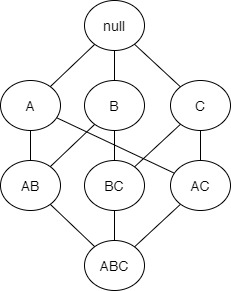

A basket can have none of the items (shown as "null"), all of the items, and anything in between, resulting in 8 possible combinations/subsets. Every node except "null" represents an **itemset**, a collection of one or more items.

## Rule mining<a id="rule-mining"></a>

Assume that we have the data of hundreds of people shopping from this market. We can analyze what they bought in two steps:
1.   Frequent itemset generation
2.   Rule generation

### Frequent itemset generation<a id="rm-1"></a>

Firstly, we can find **frequent itemset**s by looking at their occurrences. For example, if we see apples and bananas together in 100 baskets out of 500, we can say the **support count (σ)** of $\{Apples, Bananas\}$ set (shown as $AB$ in the diagram) is 50 while its **support** is 100/500 = 0.2 or 20%. Support can be seen as the probability. So, the support of $\{Apples\}$ can be shown as $P(\{Apples\})$ or $P(Apples)$.

While finding the frequent itemsets, we define a minimum support value to agree on what counts as "frequent." For example, if our minimum support is 0.1, we can say any itemset that occurs at least 10% is a frequent itemset. Logically, an itemset cannot occur more frequently than any of its subsets. If the support count of $\{Apples, Bananas\}$ is 100, ${Apples}$ cannot occur more than 100 times. This also suggests that if an itemset is frequent, all of its *sub*sets must also be frequent. In other words, if an itemset is *in*frequent, all of its *super*sets must also be infrequent, which is known as **the apriori principle**.

Let us think with a concrete example. Assume that our minimum support is 10%, and only 5% of the baskets have coconuts. Since $\{Coconuts\}$ is infrequent (0.05 < 0.1), we do not need to check whether $\{Apples, Coconuts\}$ or any superset of $\{Coconuts\}$ is frequent. The apriori principle immediately cut the number of checks we would need to do by more than 50% in this scenario! Based on this principle, using **the apriori algorithm**, we can *prune* the candidate frequent itemsets as follows:
*   Let k = 1
*   Repeat until no new frequent itemsets are identified:
    *   Generate frequent itemsets with length of k out of the candidate frequent itemsets at hand
    *   Eliminate itemsets that are not frequent
    *   Prune supersets of the eliminated candidate frequent itemsets
    *   Increase k by 1
    
Assuming $\{Apples\}$, $\{Bananas\}$, and $\{Apples, Bananas\}$ are frequent but not $\{Coconuts\}$, we would prune any itemset that contains $\{Coconuts\}$ as shown below:

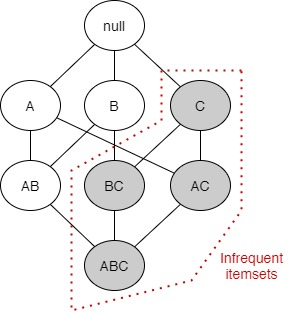

While this is faster than brute-forcing the frequent itemset generation (checking each set to see whether it is frequent or not), it can still be computationally expensive based on the minimum support and the number of items.

#### Frequent itemset storage<a id="rm-1-2"></a>

As you might have imagined, storing every single frequent itemset may not be efficient. We can use the *maximal frequent* or *closed* itemsets to solve this issue. A **maximal frequent itemset** is a frequent itemset with no frequent supersets (it is enough to check the immediate supersets instead of all of them). In our scenario, the only maximal frequent itemset is $AB$ since all of its superset (there is only one in this case) are infrequent. Maximal frequent itemsets are useful because they let us store the frequent itemsets in an efficient way. By simply storing $AB$, we can derive that both $A$ and $B$ are frequent without separately storing them:

<table>
    <thead>
        <tr>
            <td colspan="2"><b>Maximal frequent itemsets</b></td>
        </tr>
        <tr>
            <td>Itemset</td>
            <td>Support</td> 
        </tr>
    </thead>
    <tbody>
        <tr>
            <td>AB</td>
            <td>0.2</td> 
        </tr>
    </tbody>
</table>

Note that maximal frequent itemsets do not give us the whole picture in terms of support. All we would know is $A$ and $B$ have at least as much support as $AB$ has. To solve this issue, we can store the closed itemsets instead. A **closed itemset** is a frequent itemset with no supersets that have the same support. Take a look at this table:

<table>
    <thead>
        <tr>
            <td colspan="2"><b>Closed itemsets</b></td>
        </tr>
        <tr>
            <td>Itemset</td>
            <td>Support</td> 
        </tr>
    </thead>
    <tbody>
        <tr>
            <td>A</td>
            <td>0.3</td> 
        </tr>
        <tr>
            <td>AB</td>
            <td>0.2</td> 
        </tr>
    </tbody>
</table>

We know that $B$ is a frequent itemset (since $AB$ is frequent), and it is not given as a closed itemset. Therefore, we can derive that it shares its support (0.2) with its closest superset that is also a closed itemset, $AB$. All maximal frequent itemsets are also closed itemsets since they naturally do not have any supersets that have the same support. Storing the closed itemsets is less space-efficient than storing the maximal frequent itemsets, but it is more informative.

We can visualize these types of frequent itemsets as follows:

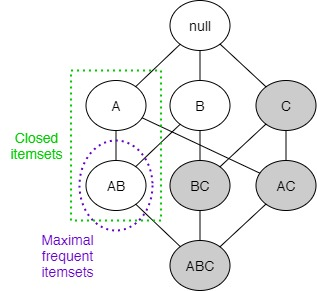

### Rule generation<a id="rm-2"></a>

Previously, we filtered itemsets based on support and found some frequent itemsets. Instead of simply stating $\{Apples, Bananas\}$ is frequent, we can now generate some rules and may find $Apples→Bananas$ or vice versa, indicating the existence of one is frequently followed by the existence of the other as well.

For rule generation, we use the **confidence**, which measures how confidently we can expect to see an itemset given another itemset. This is also known as conditional probability. Here is an example: Assume that we want to calculate the confidence of $Bananas→Apples$. This implies a conditional probability that can be denoted as $P(Apples|Bananas)$.

As a reminder, the conditional probability formula is $P(A|B) = \dfrac{P(A, B)}{P(B)}$.

Therefore, $P(Apples|Bananas) = \dfrac{P(\{Apples, Bananas\})}{P(Bananas)}$.

Using the previously given support (probability) values, this conditional probability is 0.2/0.2 = 1. Not surprising. If $B$ has the same support as $AB$, it means all of $B$'s occurrences also contain $A$, so we can expect to see $A$ whenever we see $B$ with a confidence of 100%. These probabilities may not be symmetrical. For example, $P(Bananas|Apples)$ is 0.67.

To simply calculate the confidence of the itemset $AB$, we can calculate the confidence for both $A$ and $B$ and take the maximum, also notated as $max\big(P(A|B), P(B|A)\big)$, which gives us max(1, 0.67) = 1.

We use the terms **"antecedent"** and **"consequent"** with rules. Antecedent is the itemset that comes first, like the premise, and the consequent is the itemset that follows.

We can generate a rule visualization using the initial itemset graph. For every node, we make the existing itemset as the consequent, and we add the items that do not exist in the node as the antecedent. So, $A$ becomes $BC→A$ and $AB$ becomes $C→AB$ as shown below:

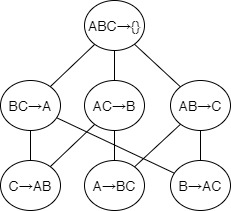

$\{\}$ represents the empty set (null). We see that subsets' consequents merge and form the common superset's consequent while the antecedent of the superset is the intersection of these two sets' antecedents. For example, merging $BC→A$ and $AC→B$ gives us $C→AB$. $\{\}→ABC$ does not make sense, so we can remove it.

Similarly, we can prune rules by defining a minimum confidence value. If a subset does not have a high confidence, its superset does not have a high confidence either.

### Other statistical measures<a id="rm-3"></a>

Even after using minimum support and confidence, rule generation can yield an overwhelming amount of rules. More importantly, confidence can be deceiving. Consider this alternative scenario:

*   $P(Apples) = 0.9$
*   $P(Bananas) = 0.2$
*   $P({Apples, Bananas}) = 0.2$
*   Minimum confidence is 0.6

Following the formula, the confidence of $Bananas→Apples$ is 0.2/0.2 = 1, which is much higher than the defined minimum confidence. However, the probability of seeing $Apples$ in any basket is already 90%, so this rule does not tell us much. We sometimes use other measures such as lift and the interest factor to overcome this.

**Lift** measures the ratio between the confidence of the rule and the support of the consequent itemset. The general formula is as follows:

$Lift(B→A) = \dfrac{P(A|B)}{P(A)}$

For the $Bananas→Apples$ rule in this scenario, the lift is 1/0.9 = 1.11. Notice that a higher $P(Apples)$ leads to a lower lift. When the lift is 1, we can say the antecedent and the consequent are statistically independent. Since our lift here is 1.11, they are positively associated. We can intuitively validate this by looking at the support values. $P(Bananas)$ having the same support with $P({Apples, Bananas})$ denotes bananas are only bought with apples.

**The interest factor** is similar to lift. It is calculated by the support of two items occurring together divided by their individual supports multiplied. By tidying up the formula, you can see it produces the same result with lift, at least for binary variables (notice that we do not actually count how many apples or bananas people buy, we simply look at their *existences*, which are binary):

$Interest(B→A) = \dfrac{P(A, B)}{P(A) \times P(B)} = \dfrac{P(A|B)}{P(A)}$

In this scenario, the interest factor is 0.2/(0.9*0.2) = 1.11 as well. The interest factor also helps us interpret the independence of two itemsets here. In probabilty, $P(A, B) = P(A) \times P(B)$ if $A$ and $B$ are independent events. Therefore, if the interest factor is 1, these two itemsets are independent. If the interest factor is greater than 1, it suggests these two itemsets are positively correlated. Otherwise, they are negatively correlated.

## Application<a id="application"></a>

We will now apply these on a dataset using Python. Let us import a randomly generated dataset of market baskets:

In [1]:
import csv

with open("market_baskets.csv", "r") as file:
    reader = csv.reader(file)
    baskets = [row for row in reader]

baskets[0]

['cucumbers',
 'potatoes',
 'dish soap',
 'disposable cups',
 'skincare product',
 'toothbrush',
 'soap',
 'deodorant',
 'candy bar']

This is the first basket in our dataset. These nine items were bought together.

To analyze these baskets, we need to install *pandas* and *mlxtend* Python packages. You are assumed to know how pandas works. If they are not already installed and you use pip, you can run the following block to install them:

In [ ]:
!pip install pandas
!pip install mlxtend

Now, we will one-hot-encode each basket and obtain a pandas DataFrame object:

In [3]:
import pandas as pd
from mlxtend.preprocessing import TransactionEncoder

te = TransactionEncoder()
baskets_encoded = te.fit(baskets).transform(baskets)
baskets_df = pd.DataFrame(baskets_encoded, columns=te.columns_)

baskets_df.head(5)

,apples,baby diaper,baby food,bananas,barbecue sauce,batteries,beer,biscuits,bread,breakfast cereal,...,toilet paper,tomato sauce,tomatoes,toothbrush,toothpaste,tuna fish,vinegar,water,wine,yoghurt
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False
1,False,False,False,True,False,True,False,True,True,True,...,False,False,True,False,True,False,False,True,False,False
2,True,False,False,False,True,True,False,False,False,False,...,False,True,False,False,False,False,False,True,True,False
3,False,True,False,True,True,False,True,True,False,True,...,True,False,False,True,True,False,False,True,True,False
4,False,False,True,False,True,False,False,True,True,False,...,True,True,True,True,False,True,True,True,False,False


Each row represents a basket, and each column represents an item. We have printed the first five rows, so we are looking at five different baskets. Cells with "True" values denote the existence of that item in the basket. The number of columns denotes the number of possible items in this supermarket. Considering we would have $2^{86}$ subsets for 86 different items, we can see how finding frequent itemsets and association rules can be computationally expensive.

Now that our baskets are in the proper format, we can use the apriori algorithm provided by mlxtend. Notice that we use a minimum support value of 0.1 here, but it is up to you. `apriori()` returns us the frequent itemsets (based on our minimum support) as a DataFrame object that we can manipulate further. We sort the values in descending order by the support and add a "length" column corresponding to the number of items in the itemsets. Note that resetting the indices after sorting the rows is not necessary, but it can prevent some confusion. Lastly, we display the top five itemsets:

In [4]:
from mlxtend.frequent_patterns import apriori

frequent_itemsets = (
    apriori(baskets_df, min_support=0.1, use_colnames=True)
    .sort_values(by="support", ascending=False)
    .reset_index(drop=True)
)
frequent_itemsets["length"] = frequent_itemsets["itemsets"].apply(lambda x: len(x))

frequent_itemsets.head(5)

,support,itemsets,length
0,0.404,(beer),1
1,0.390,(ketchup),1
2,0.370,(pasta),1
3,0.360,(tissues),1
4,0.358,(dish soap),1


We can search for some specific itemsets here. For example, we can retrieve itemsets that have more than one items in them using pandas:

In [5]:
frequent_itemsets[frequent_itemsets.length > 1].head(5)

,support,itemsets,length
86,0.224,"(baby diaper, beer)",2
87,0.200,"(ketchup, beer)",2
88,0.196,"(ketchup, pasta)",2
89,0.194,"(frozen seafood, beer)",2
90,0.192,"(ketchup, canned soup)",2


We can search for some specific items using a custom function. Let us look at frequent itemsets that include "pasta" below:

In [6]:
def in_itemset(haystack, needle):
    # Verify an item/itemset (needle) exists in another itemset (haystack).
    if needle in haystack or set(needle).issubset(set(haystack)):
        return True
    else:
        return False


frequent_itemsets[frequent_itemsets.itemsets.apply(lambda x: in_itemset(x, "pasta"))].head(5)

,support,itemsets,length
2,0.370,(pasta),1
88,0.196,"(ketchup, pasta)",2
102,0.176,"(beer, pasta)",2
103,0.176,"(pasta, tissues)",2
183,0.156,"(canned soup, pasta)",2


This function also works with tuples (itemsets). Here, we will look for baskets that contain "pasta" and "ketchup" together:

In [7]:
frequent_itemsets[
    frequent_itemsets.itemsets.apply(lambda x: in_itemset(x, ("pasta", "ketchup")))
].head(5)

,support,itemsets,length
88,0.196,"(ketchup, pasta)",2
3486,0.102,"(ketchup, pasta, tissues)",3
3573,0.100,"(ketchup, beer, pasta)",3


We can use `association_rules()` from *mlxtend* to mine some rules. This time we will use confidence instead of support, and define our minimum confidence as 0.1. Similarly, we will sort the results based on our metric in descending order, and display the top five rules:

In [8]:
from mlxtend.frequent_patterns import association_rules

rules = (
    association_rules(frequent_itemsets, metric="confidence", min_threshold=0.1)
    .sort_values(by="confidence", ascending=False)
    .reset_index(drop=True)
)

# You may want to count the items in each rule for filtering purposes.
rules["length"] = rules.apply(
    lambda x: len(x["antecedents"]) + len(x["consequents"]), axis=1
)

rules.head(5)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,length
0,"(baby diaper, candy bar)",(beer),0.118,0.404,0.102,0.864407,2.139621,0.054328,4.395500,3
1,"(fried chicken, baby diaper)",(beer),0.132,0.404,0.102,0.772727,1.912691,0.048672,2.622400,3
2,"(baby diaper, tissues)",(beer),0.142,0.404,0.108,0.760563,1.882583,0.050632,2.489176,3
3,"(cupcakes, baby diaper)",(beer),0.142,0.404,0.106,0.746479,1.847720,0.048632,2.350889,3
4,"(breakfast cereal, baby diaper)",(beer),0.156,0.404,0.116,0.743590,1.840569,0.052976,2.324400,3


Most of the columns must be familiar to you by now. The first row is about the $\{baby diaper, candy bar\}→\{beer\}$ rule. Antecedent support denotes the support of the left-hand side ($\{baby diaper, candy bar\}$) and consequent support denotes the support of the right-hand side ({beer}) while the other metrics belong to the rule itself.

You will not use leverage and conviction as much, but you may be wondering how they are calculated. **Leverage** measures how much two itemsets appear together than they do separately. Its formula is as follows:

$Leverage(A→B) = P(A, B) - P(A) \times P(B)$

The idea, already explained with the interest factor, is the compound probability of two independent items occurring together equals their probabilities multiplied. So, if two items are independent indeed, their leverage would be 0.

**Conviction** measures how incorrect the rule would be assuming the antecedent and consequent itemsets are independent. Its formula is as follows:

$Conviction(A→B) = \dfrac{P(A) \times P(\overline{B})}{P(A, \overline{B})}$

$P(\overline{B})$ denotes the possiblity of B not occurring, which is $1 - P(B)$.

In [9]:
rules[rules.antecedents.apply(lambda x: in_itemset(x, "baby diaper"))].head(5)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,length
0,"(baby diaper, candy bar)",(beer),0.118,0.404,0.102,0.864407,2.139621,0.054328,4.395500,3
1,"(fried chicken, baby diaper)",(beer),0.132,0.404,0.102,0.772727,1.912691,0.048672,2.622400,3
2,"(baby diaper, tissues)",(beer),0.142,0.404,0.108,0.760563,1.882583,0.050632,2.489176,3
3,"(cupcakes, baby diaper)",(beer),0.142,0.404,0.106,0.746479,1.847720,0.048632,2.350889,3
4,"(breakfast cereal, baby diaper)",(beer),0.156,0.404,0.116,0.743590,1.840569,0.052976,2.324400,3


We can filter these rules by an item or an itemset as well:

In [10]:
rules[rules.antecedents.apply(lambda x: in_itemset(x, "pasta"))].head(5)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,length
53,"(tissues, pasta)",(beer),0.176,0.404,0.106,0.602273,1.490774,0.034896,1.498514,3
55,"(beer, pasta)",(tissues),0.176,0.360,0.106,0.602273,1.672980,0.042640,1.609143,3
69,"(tissues, pasta)",(ketchup),0.176,0.390,0.102,0.579545,1.486014,0.033360,1.450811,3
75,"(pasta, beer)",(ketchup),0.176,0.390,0.100,0.568182,1.456876,0.031360,1.412632,3
114,(pasta),(ketchup),0.370,0.390,0.196,0.529730,1.358281,0.051700,1.297126,2
